In [41]:
%matplotlib widget
import math
import numpy as np
import matplotlib.pyplot as plt
from cmcrameri import cm as cmc

plt.rcParams.update({
    'font.size': 10,
    'text.usetex': True,
    'font.family': 'Optima',
    'text.latex.preamble': r"\usepackage{amsmath}"
})

Text(0.5, 0, 'number of peaks')

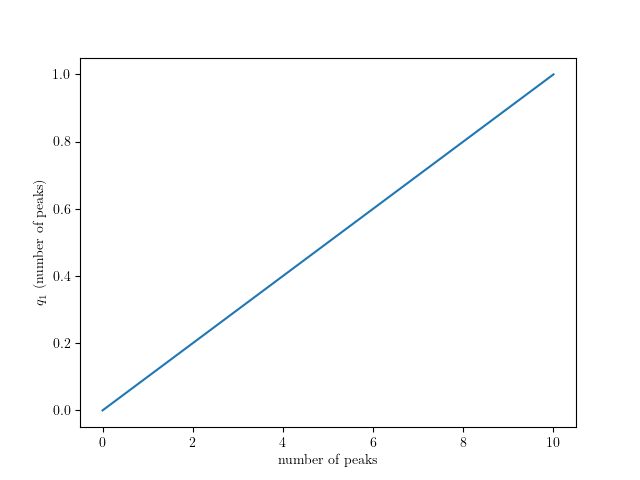

In [46]:
fig, ax = plt.subplots()
n_subsegs = 10 
n_peaks = np.arange(10,-1, -1)
q1 = n_peaks / n_subsegs
ax.plot(n_peaks, q1)
ax.set_ylabel(r'$q_1$ (number of peaks)')
ax.set_xlabel(r'number of peaks')

Text(0.5, 0, 'mean prominence of peaks')

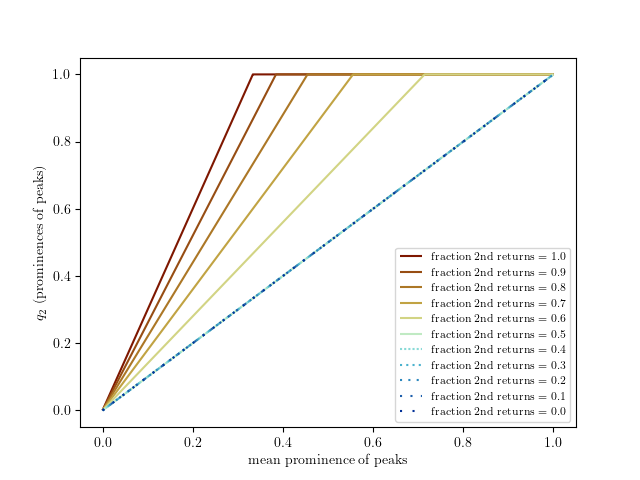

In [45]:
fig, ax = plt.subplots()
mean_prominences = np.linspace(0,1,1000)
ncol = 11
cols = cmc.roma(np.linspace(0,1,ncol))
for i,frac_2ndreturns in enumerate(np.linspace(1,0,ncol)):
    q2 = [np.clip(mean_prom * ((np.clip(2*frac_2ndreturns, 1, None)-1)*2+1), 0, 1) for mean_prom in mean_prominences]
    # np.clip(np.mean(prominences) * ((np.clip(2*frac_2ndreturns, 1, None)-1)*2+1), 0, 1)
    ax.plot(mean_prominences, q2, color=cols[i,:], label='fraction 2nd returns = %.1f' % frac_2ndreturns,
           ls=(0,(1,np.clip(i-5,0,5))))
ax.legend(loc='lower right', fontsize=8)
ax.set_ylabel(r'$q_2$ (prominences of peaks)')
ax.set_xlabel(r'mean prominence of peaks')

Text(0.5, 0, 'total elevation spread of peaks')

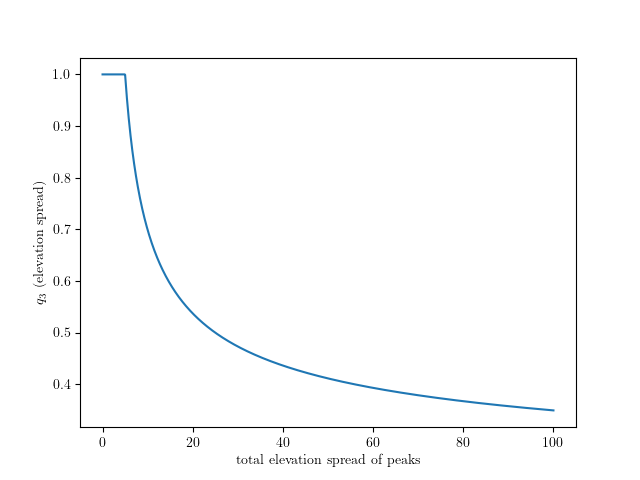

In [47]:
fig, ax = plt.subplots()
h_range = np.linspace(0,100, 1000)
q3 = np.array([np.clip(1/math.log(np.clip(h,1.1,None),5), 0, 1) for h in h_range])
ax.plot(h_range, q3)
ax.set_ylabel(r'$q_3$ (elevation spread)')
ax.set_xlabel(r'total elevation spread of peaks')

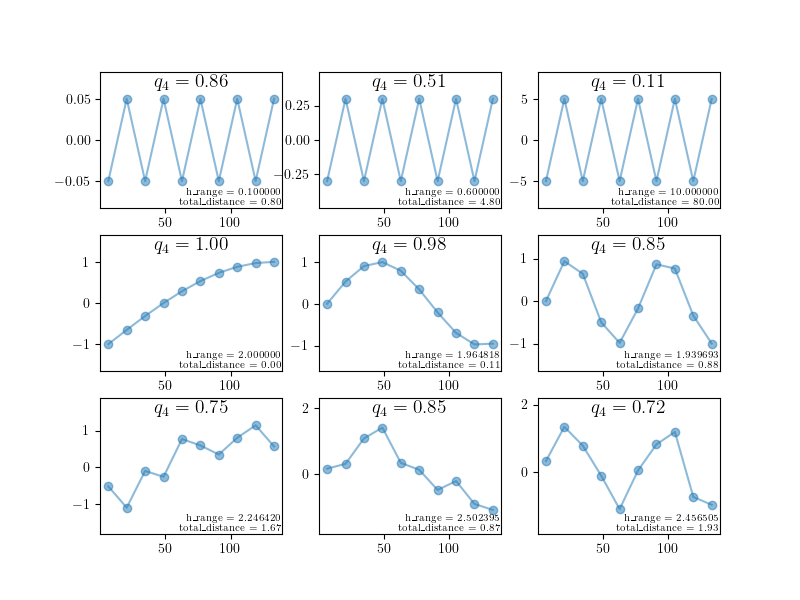

In [118]:
n = 10
x = np.linspace(7,133, n)
a1 = 0.05
h1 = [-a1 if i%2==0 else a1 for i in range(n)]
a2 = 0.3
h2 = [-a2 if i%2==0 else a2 for i in range(n)]
a3 = 5
h3 = [-a3 if i%2==0 else a3 for i in range(n)]
xx = np.linspace(0, np.pi/2, n)
f = 1
h4 = f * np.sin(xx)*2 - f
h5 = f * np.sin(xx*3.2)
h6 = f * np.sin(xx*7)
d = 0.5
h7 = h4 + np.random.uniform(-d,d,n)
h8 = h5 + np.random.uniform(-d,d,n)
h9 = h6 + np.random.uniform(-d,d,n)
hvals = [h1, h2, h3, h4, h5, h6, h7, h8, h9]

fig, axs = plt.subplots(nrows=3,ncols=3, figsize=[8,6])
axs = axs.flatten()

for i,elev_2ndpeaks in enumerate(hvals):
    ax = axs[i]
    h_range = np.max(elev_2ndpeaks) - np.min(elev_2ndpeaks)
    diffs = np.diff(elev_2ndpeaks)
    dirchange = np.abs(np.diff(np.sign(diffs))) > 1
    total_distance = 0.0
    for i,changed in enumerate(dirchange):
        # if changed: total_distance += (np.abs(diffs)[i] + np.abs(diffs)[i+1])/2
        if changed: total_distance += np.min((np.abs(diffs)[i], np.abs(diffs)[i+1]))
    alignment_penalty = np.clip(np.clip(h_range, 0.5*n_subsegs, None) / (total_distance + np.clip(h_range, 0.5*n_subsegs, None)), 0, 1)
    # alignment_penalty = 1 - total_distance / (np.clip(h_range,0,0.5)*(n-1))
    # thresh = 0.3
    # total_distance = np.sum(np.clip(np.abs(diffs)-thresh, 0, None))
    # alignment_penalty = 1 - (4*(total_distance-h_range) / (h_range*(n-1)))
    # alignment_penalty = np.clip(alignment_penalty, 0,1)
    ax.plot(x, elev_2ndpeaks,marker='o', alpha=0.5)
    ax.text(0.5, 0.99, '$q_4 = %.2f$' % alignment_penalty, ha='center', va='top', transform=ax.transAxes, fontsize=14)
    txt = 'h_range = %2f' % h_range
    txt += '\ntotal_distance = %.2f' % total_distance
    ax.text(0.99, 0.01, txt, ha='right', va='bottom', transform=ax.transAxes, fontsize=7)

for ax in axs:
    yl = ax.get_ylim()
    ax.set_ylim(np.array(yl)*1.5)

In [ ]:
fig, ax = plt.subplots()

h_range = np.linspace(0,100, 1000)
q3 = np.array([np.clip(1/math.log(np.clip(h,1.1,None),5), 0, 1) for h in h_range])
ax.plot(h_range, q3)
ax.set_ylabel(r'$q_3$ (elevation spread)')
ax.set_xlabel(r'total elevation spread of peaks')

In [83]:
plt.close('all')